In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import VARMAX
from statsmodels.tsa.base.datetools import dates_from_str

## Constructing an Arma Model

In [28]:
df = pd.read_csv("Cleaned Datasets/Merged_data.csv")
df = df.loc[df["Country"]=="UNITED STATES"]
df["Log GDP"] = np.log(df["GDP"])
df.head()

,Country,Code,Year,avg_years_of_schooling,GDP,GENC,Population,Male Population,Female Population,Annual Growth Rate %,...,"Under Age 5 Mortality, Both Sexes","Under Age 5 Mortality, Males","Under Age 5 Mortality, Females",Crude Death Rate,"Deaths, both sexes",Net Migration Rate,"Net international migrants, both sexes",Fertility Rate,Dependency Ratio,Log GDP
3469,UNITED STATES,USA,1960,8.90,5.433000e+11,US,180671158,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.65,66.793151,27.020927
3470,UNITED STATES,USA,1965,9.82,7.437000e+11,US,194302963,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.91,67.041566,27.334904
3471,UNITED STATES,USA,1970,10.61,1.073303e+12,US,205052174,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.47,61.517115,27.701762
3472,UNITED STATES,USA,1975,11.40,1.684904e+12,US,215973199,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.77,55.178314,28.152730
3473,UNITED STATES,USA,1980,11.94,2.857307e+12,US,227224681,110398730.0,116825951.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.83,50.946063,28.680901


In [64]:
# Combine variables into a single DataFrame
# I opted to start at 1990 because that's when the data starts to become yearly. 
# We should really fix the dataset to get yearly data for the first 30 years though
df = df[df['Year'] >= 1990]

variables = ['Log GDP', 'avg_years_of_schooling','Fertility Rate']
df_var = df[variables]
df_var.index = pd.period_range(start='1990', end='2017', freq='Y')

# Fit VARMAX model
model = VARMAX(df_var, order=(2, 2)) # TODO: I chose the order (p=2,q=2) arbitrarily. We should probably do some AIC or something to find the best choice
results = model.fit(disp=False)

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


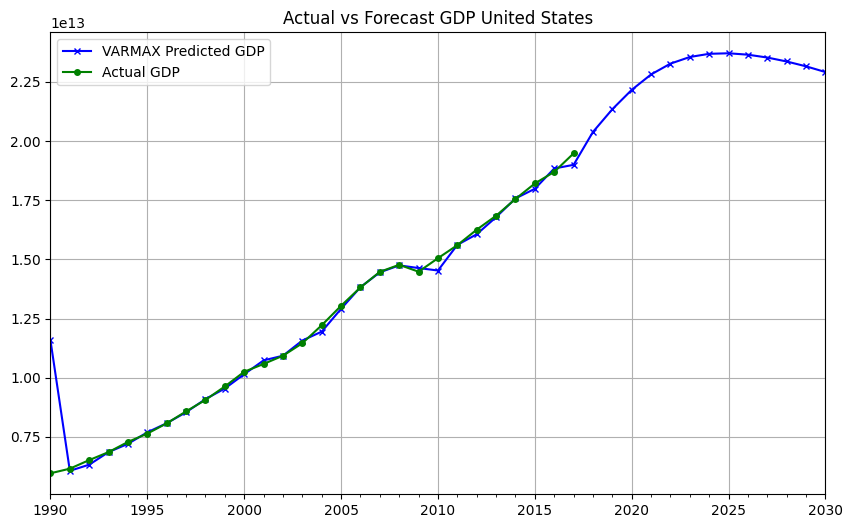

In [76]:
# Forecast GDP
forecast_steps = 5  # Number of steps ahead to forecast
forecast = results.forecast(steps=forecast_steps)

# These two lines let us plot confidence intervals I think
#forecast_obj = results.get_forecast('2020')
#allConfidenceIntervals = forecast_obj.conf_int(alpha=0.05)

# Plot GDP along with the smoothed version (and forecasted through 2030)
pred = results.predict('1990', '2030') # If we wanted to show only the future prediction, we would change the start date to 2017
np.exp(pred['Log GDP']).plot(figsize=(10,6), label="VARMAX Predicted GDP", marker='x', color='b', markersize=4)
plt.plot(np.exp(df_var['Log GDP']), label="Actual GDP", marker='o', color='g', markersize=4)
plt.title('Actual vs Forecast GDP United States')
plt.legend()
plt.grid(True)
plt.show()
